In [18]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [19]:
# 1. 生成数据集
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w))) # 创建输入特征, 每个元素服从均值为0、标准差为1的正态分布, 形状为(num_examples, len(w))
    y = torch.matmul(X, w) + b # 计算线性回归的标签
    y += torch.normal(0, 0.01, y.shape) # 加点噪声
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features, labels

(tensor([[ 0.0389, -0.8421],
         [ 0.0444,  0.4278],
         [ 0.4595, -0.7185],
         ...,
         [-0.1315,  0.6035],
         [ 0.3451,  0.0272],
         [-0.0053,  0.5567]]),
 tensor([[ 7.1520e+00],
         [ 2.8353e+00],
         [ 7.5628e+00],
         [ 4.1928e+00],
         [-1.7383e+00],
         [ 2.5030e+00],
         [ 4.3287e+00],
         [ 1.4928e+00],
         [ 1.4267e+00],
         [-6.8903e+00],
         [ 5.1864e+00],
         [ 6.7087e+00],
         [ 7.5563e+00],
         [ 3.9699e+00],
         [ 9.0350e+00],
         [ 7.9926e+00],
         [ 3.5142e+00],
         [ 4.7332e+00],
         [ 6.3753e+00],
         [ 9.7181e-01],
         [ 6.0778e+00],
         [ 4.5035e+00],
         [ 7.1454e+00],
         [-4.0072e-01],
         [ 7.5531e+00],
         [ 1.1637e+00],
         [ 5.0678e-01],
         [ 4.6945e-01],
         [ 6.5174e+00],
         [-2.0569e+00],
         [ 8.8418e+00],
         [ 4.1748e+00],
         [-1.3289e+00],
         [ 2.4744e

In [20]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.0389, -0.8421]) 
label: tensor([7.1520])


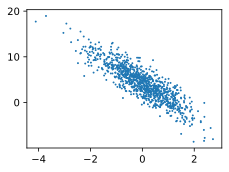

In [21]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [28]:
# 2. 读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 创建一个包含样本索引的列表
    random.shuffle(indices) # 这些样本是随机读取的，没有特定的顺序

    # 迭代获取每一个小批量样本
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [29]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9854,  0.5057],
        [ 0.1394, -0.7312],
        [-0.5056,  1.1880],
        [ 1.2670, -2.7767],
        [-0.7903,  0.2405],
        [-1.5968, -2.2029],
        [ 0.3969,  0.1581],
        [ 0.1281, -0.3640],
        [-0.6118,  1.5885],
        [-0.2220, -2.3219]]) 
 tensor([[ 0.4989],
        [ 6.9556],
        [-0.8604],
        [16.1772],
        [ 1.7948],
        [ 8.5157],
        [ 4.4667],
        [ 5.6914],
        [-2.4198],
        [11.6545]])


In [34]:
# 3. 初始化模型参数
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[-0.0158],
         [-0.0087]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [35]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [36]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [ ]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

In [ ]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

In [ ]:
def print_user_info(name, *, age, gender='M'):
    print(f'Name: {name}, Age: {age}, Gender: {gender}')

print_user_info("zs", age=2, gender='F')
print_user_info("ls", age=5)